
### Titanic Dataset Preprocessing Pipeline
-----------------------------------
This script preprocesses the Titanic dataset by:
1. Handling missing values
2. Removing outliers
3. Encoding categorical variables
4. Scaling numerical features

Output: Clean dataset ready for modeling


### Step:1 Import libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

### Step:2 Overview of dataset 

In [2]:
# Load the dataset
titanic_df = sns.load_dataset('titanic')
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Step:3 Understanding the Data

In [3]:
print("Rows in the dataset:",[titanic_df.shape[0]])
print("Columns in the dataset:",[titanic_df.shape[1]])

Rows in the dataset: [891]
Columns in the dataset: [15]


In [4]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic_df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Step4:Handling missing values

In [8]:
# Check for missing values
titanic_df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
# missing value percentage 
print(titanic_df.isnull().sum()/len(titanic_df)*100)

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


Missing values in columns like Age, Deck,Embarked and Embark_town

In [10]:
titanic_df['age'].fillna(titanic_df['age'].median(),inplace=True)

titanic_df.drop(columns=['deck'],inplace=True)

titanic_df['embarked'].fillna(titanic_df['embarked'].mode()[0],inplace=True)

titanic_df['embark_town'].fillna(titanic_df['embark_town'].mode()[0],inplace=True)


C:\Users\sanrkin\AppData\Local\Temp\ipykernel_9344\577215265.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['age'].fillna(titanic_df['age'].median(),inplace=True)
C:\Users\sanrkin\AppData\Local\Temp\ipykernel_9344\577215265.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [11]:
titanic_df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [12]:
# Drop irrelevant columns
titanic_df.drop(columns=['parch','sibsp'], inplace=True)

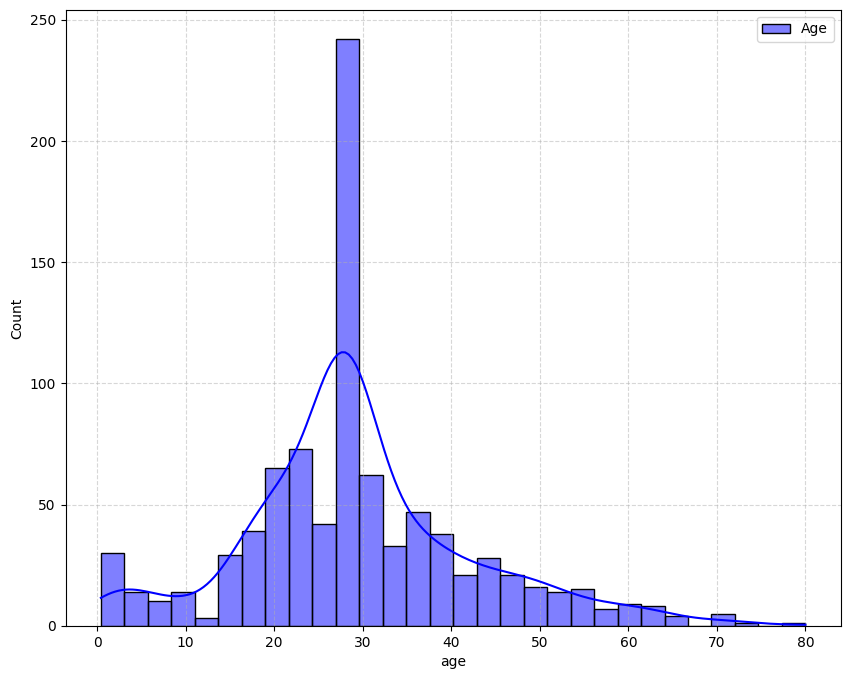

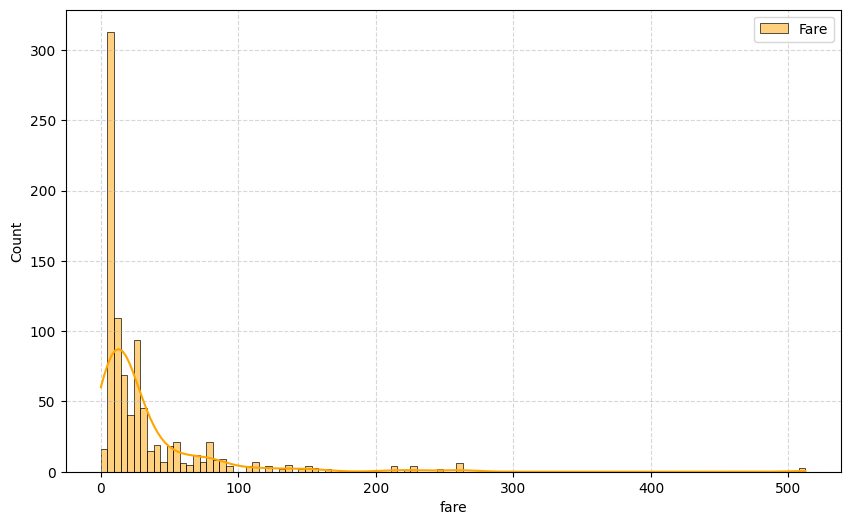

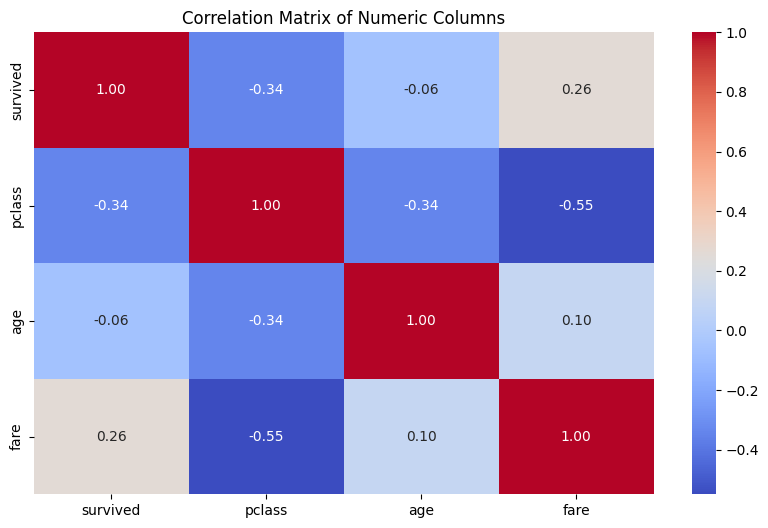

In [13]:

# Distribution of numerical features
plt.figure(figsize=(10, 8))
sns.histplot(data=titanic_df, x='age', kde=True, color='blue', label='Age')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

# Plot histogram for 'fare'
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_df, x='fare', kde=True, color='orange', label='Fare')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

numeric_df = titanic_df.select_dtypes(include=['number'])

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

### Step5:Handling outliers

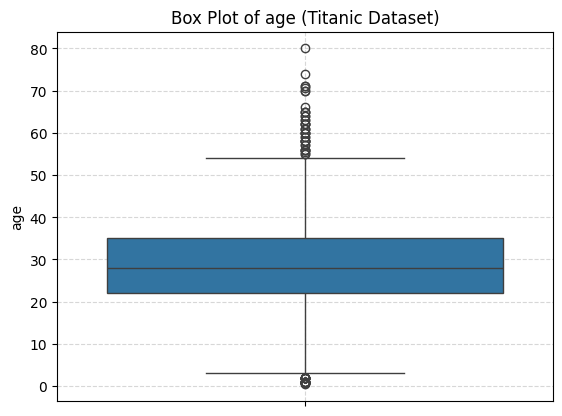

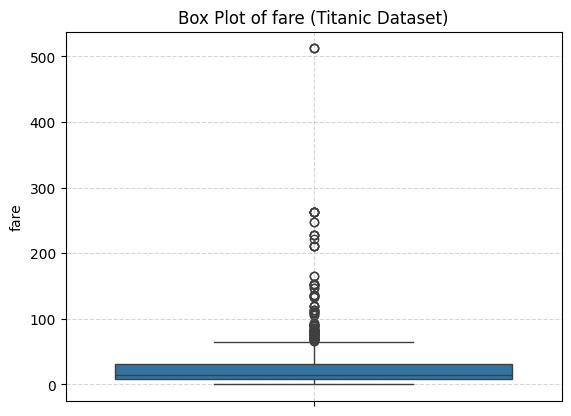

In [14]:
numerical_columns = ['age','fare']

for col in numerical_columns:
    sns.boxplot(data=titanic_df,y=col)
    plt.title(f"Box Plot of {col} (Titanic Dataset)")
    plt.grid(True,linestyle='--',alpha=0.5)
    plt.show()

we can see there are outliers in the age and fare columns

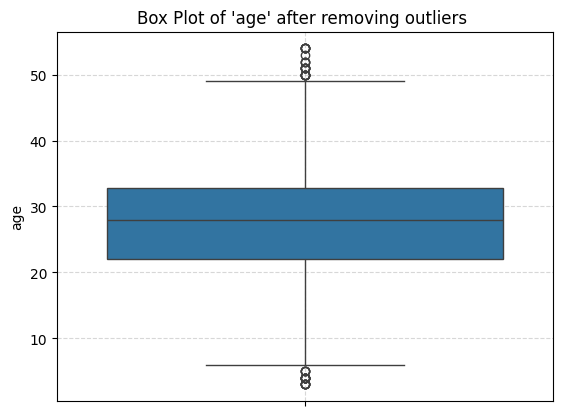

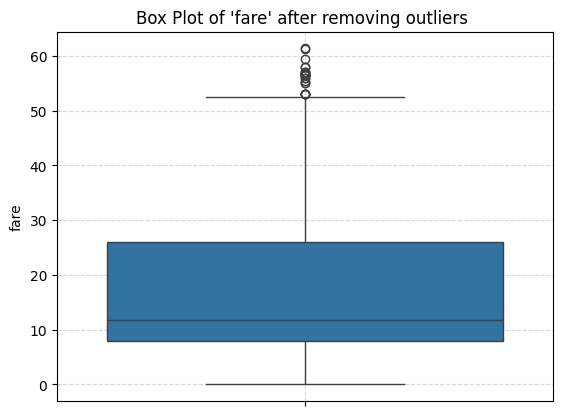

In [15]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the bounds for filtering
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the dataset to keep only non-outlier data
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

titanic_data_cleaned = remove_outliers(titanic_df,'age')
titanic_data_cleaned = remove_outliers(titanic_data_cleaned,'fare')

for col in numerical_columns:
    sns.boxplot(data=titanic_data_cleaned,y=col)
    plt.title(f"Box Plot of '{col}' after removing outliers ")
    plt.grid(True,linestyle='--',alpha=0.5)
    plt.show()


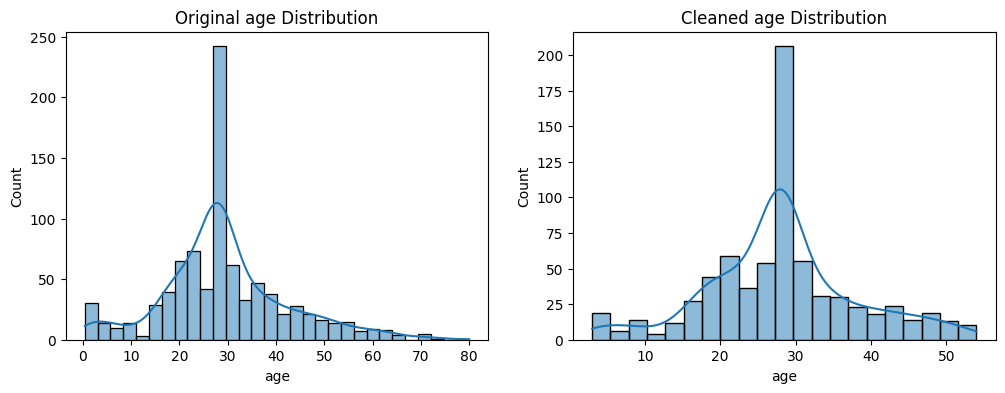

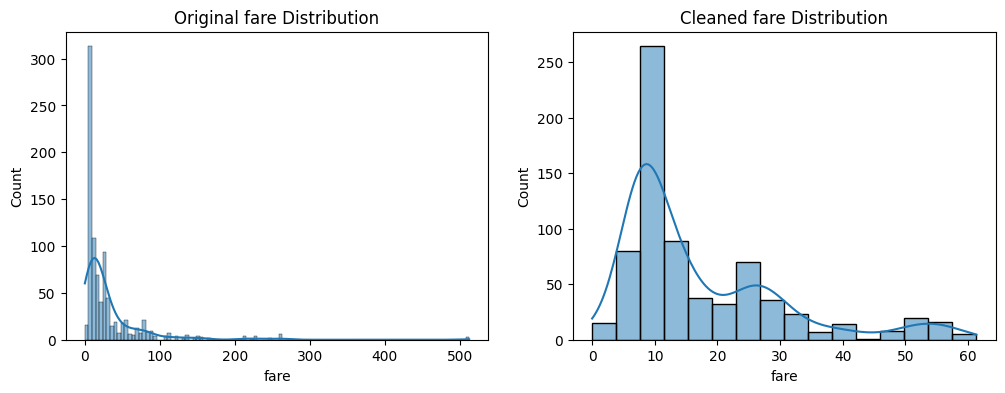

In [16]:

def plot_distribution_comparison(df_original, df_cleaned, column):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df_original[column], kde=True)
    plt.title(f'Original {column} Distribution')
    plt.subplot(1, 2, 2)
    sns.histplot(df_cleaned[column], kde=True)
    plt.title(f'Cleaned {column} Distribution')
    plt.show()

# Use for each numerical column
for col in numerical_columns:
    plot_distribution_comparison(titanic_df, titanic_data_cleaned, col)


### Step 6:Dealing with Categorical Data

In [17]:
titanic_data_cleaned

,survived,pclass,sex,age,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,7.2500,S,Third,man,True,Southampton,no,False
2,1,3,female,26.0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,8.0500,S,Third,man,True,Southampton,no,True
5,0,3,male,28.0,8.4583,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,30.0000,C,First,man,True,Cherbourg,yes,True


In [18]:
# Create separate encoders
le_sex = LabelEncoder()
le_who = LabelEncoder()

# Encode sex
titanic_data_cleaned['sex_encoded'] = le_sex.fit_transform(titanic_data_cleaned['sex'])

# Encode who
titanic_data_cleaned['who_encoded'] = le_who.fit_transform(titanic_data_cleaned['who'])

# If you need to know the mapping:
print("Sex categories:", le_sex.classes_)
print("Who categories:", le_who.classes_)


Sex categories: ['female' 'male']
Who categories: ['child' 'man' 'woman']


### Step 7: Convert Categorical Columns into Numerical

In [19]:

# Initialize OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)  # Use sparse=False for a dense array

# Fit and transform the 'class' column
encoded_class = ohe.fit_transform(titanic_data_cleaned[['class']])  #2d 

# Convert the encoded array to a DataFrame with proper column names
class_encoded_df = pd.DataFrame(encoded_class, columns=ohe.get_feature_names_out(['class']))


# Ensure the encoded DataFrame has the same index as the original DataFrame
class_encoded_df.index = titanic_data_cleaned.index

# Concatenate the encoded DataFrame with the original DataFrame
df_titanic = pd.concat([titanic_data_cleaned, class_encoded_df], axis=1)

# Display the resulting DataFrame
df_titanic

,survived,pclass,sex,age,fare,embarked,class,who,adult_male,embark_town,alive,alone,sex_encoded,who_encoded,class_First,class_Second,class_Third
0,0,3,male,22.0,7.2500,S,Third,man,True,Southampton,no,False,1,1,0.0,0.0,1.0
2,1,3,female,26.0,7.9250,S,Third,woman,False,Southampton,yes,True,0,2,0.0,0.0,1.0
3,1,1,female,35.0,53.1000,S,First,woman,False,Southampton,yes,False,0,2,1.0,0.0,0.0
4,0,3,male,35.0,8.0500,S,Third,man,True,Southampton,no,True,1,1,0.0,0.0,1.0
5,0,3,male,28.0,8.4583,Q,Third,man,True,Queenstown,no,True,1,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,Second,man,True,Southampton,no,True,1,1,0.0,1.0,0.0
887,1,1,female,19.0,30.0000,S,First,woman,False,Southampton,yes,True,0,2,1.0,0.0,0.0
888,0,3,female,28.0,23.4500,S,Third,woman,False,Southampton,no,False,0,2,0.0,0.0,1.0
889,1,1,male,26.0,30.0000,C,First,man,True,Cherbourg,yes,True,1,1,1.0,0.0,0.0


### Step 8: Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale Age and Fare columns
df_titanic[['Age', 'Fare']] = scaler.fit_transform(df_titanic[['age', 'fare']])

df_titanic.head()


,survived,pclass,sex,age,fare,embarked,class,who,adult_male,embark_town,alive,alone,sex_encoded,who_encoded,class_First,class_Second,class_Third,Age,Fare
0,0,3,male,22.0,7.2500,S,Third,man,True,Southampton,no,False,1,1,0.0,0.0,1.0,-0.607611,-0.751265
2,1,3,female,26.0,7.9250,S,Third,woman,False,Southampton,yes,True,0,2,0.0,0.0,1.0,-0.207827,-0.700265
3,1,1,female,35.0,53.1000,S,First,woman,False,Southampton,yes,False,0,2,1.0,0.0,0.0,0.691688,2.712961
4,0,3,male,35.0,8.0500,S,Third,man,True,Southampton,no,True,1,1,0.0,0.0,1.0,0.691688,-0.690821
5,0,3,male,28.0,8.4583,Q,Third,man,True,Queenstown,no,True,1,1,0.0,0.0,1.0,-0.007934,-0.659971
